Importing libraries and dataset

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the dataset
data = pd.read_excel('Bankruptcy (2).xlsx')

In [38]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [39]:
data.shape

(250, 7)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [41]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There’s no indication of outliers or extreme imbalance in any risk factor. The distributions appear consistent and symmetrical across all variables.

In [42]:
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [43]:
data.duplicated().sum()

147

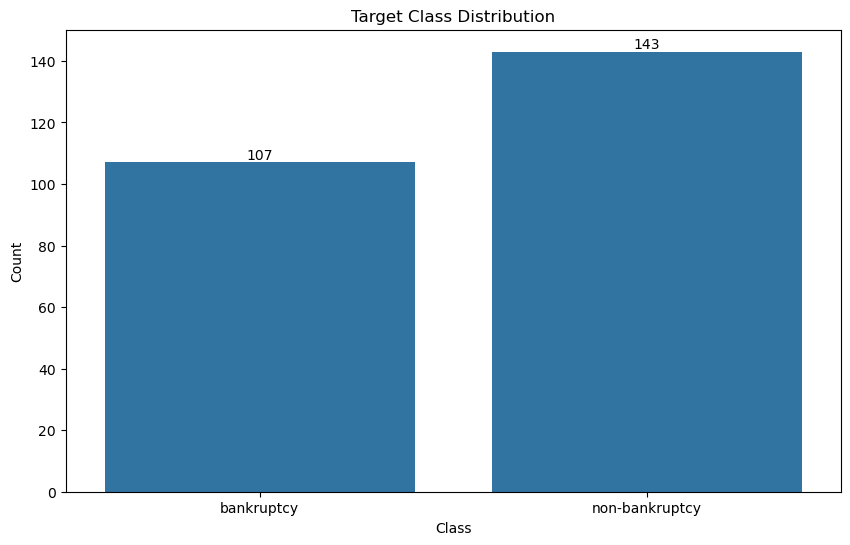

In [44]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='class', data=data)
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Add count labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()


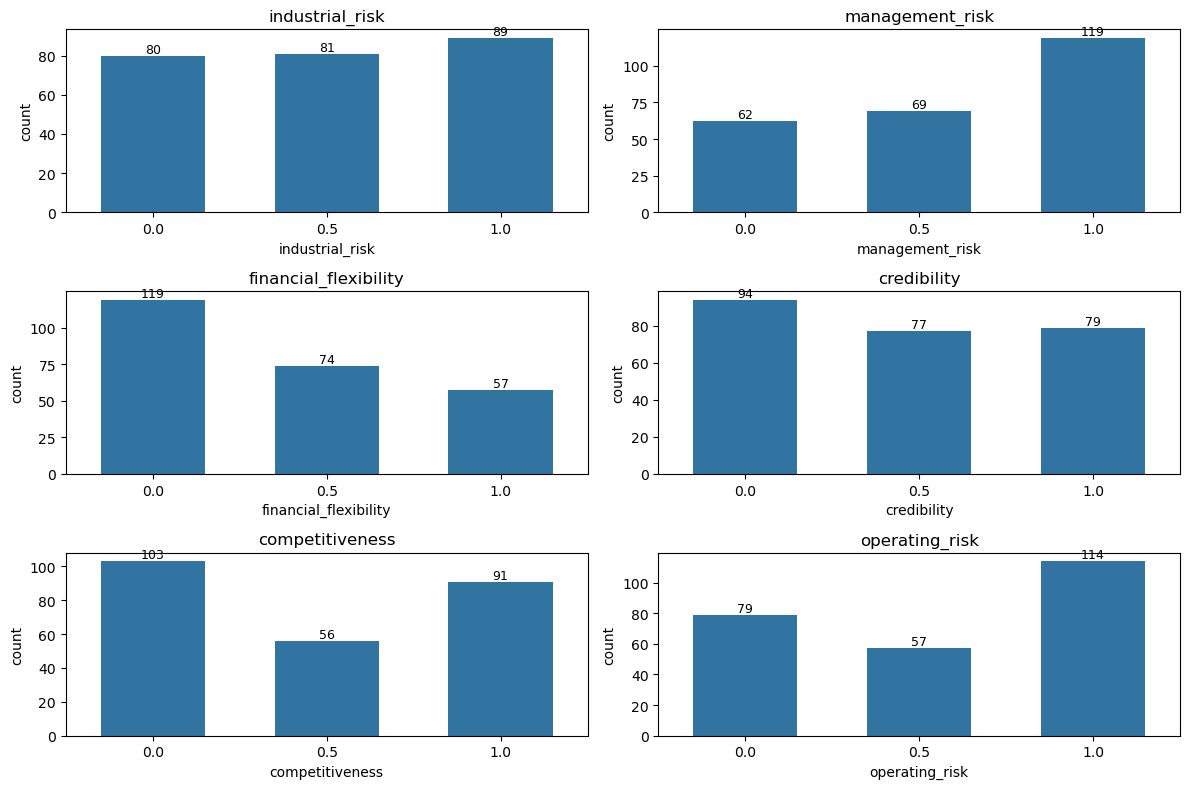

In [45]:
#Distribution of risk factors
cols = ['industrial_risk', 'management_risk', 'financial_flexibility',
        'credibility', 'competitiveness', 'operating_risk']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(x=col, data=data, width=0.6) 
    plt.title(col)
    
    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=9)

plt.tight_layout()
plt.show()


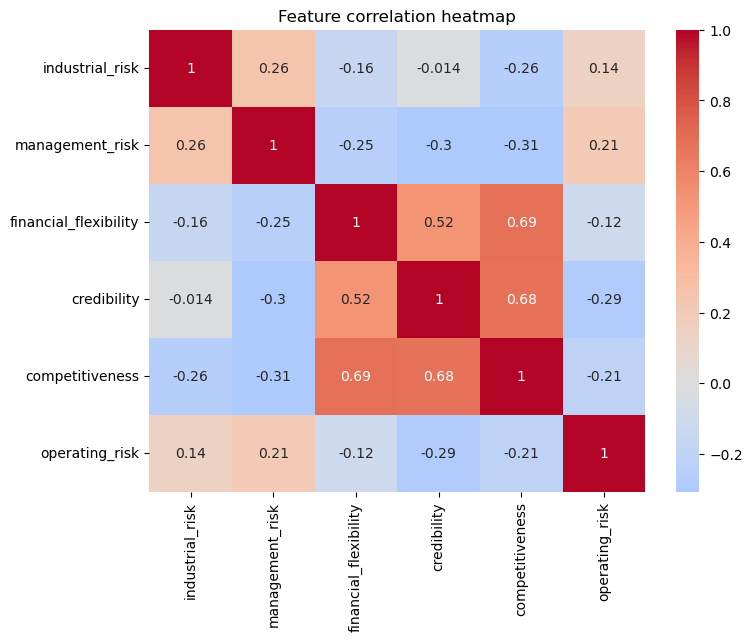

In [46]:
# Correlation heatmap among features
plt.figure(figsize=(8,6))
corr = data[cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature correlation heatmap')
plt.show()

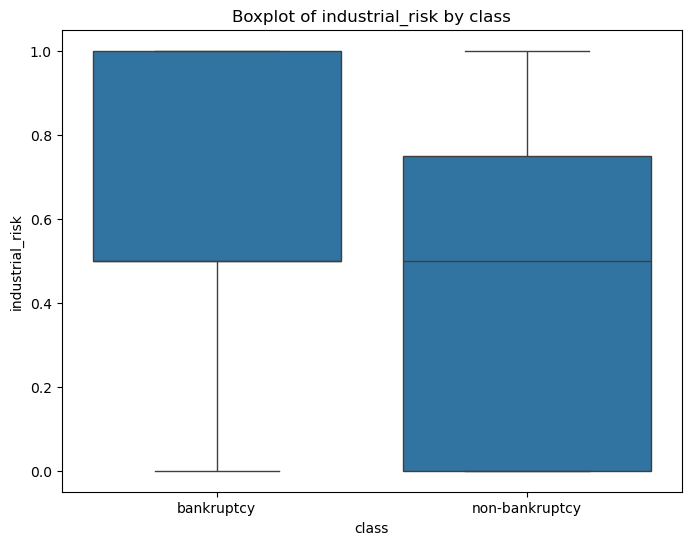

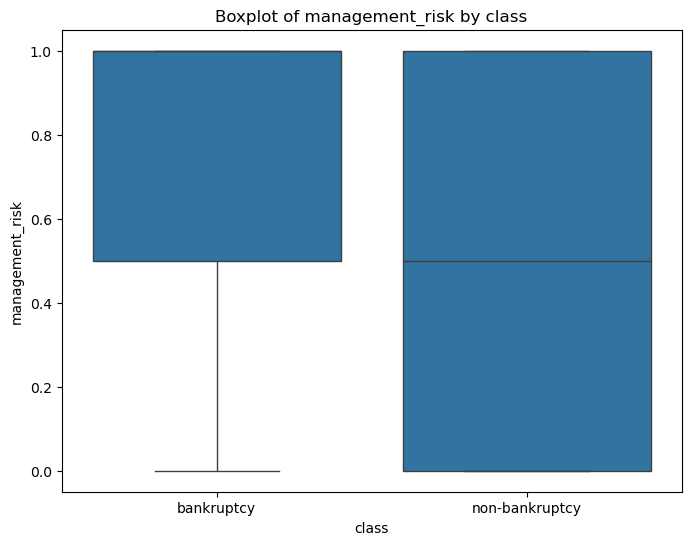

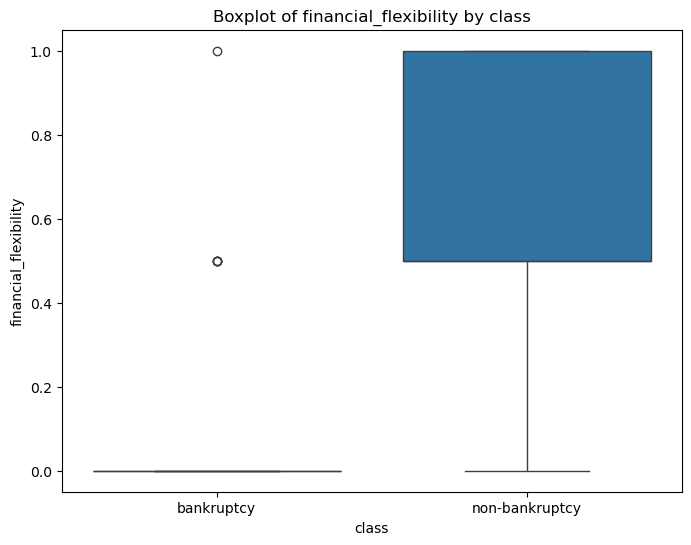

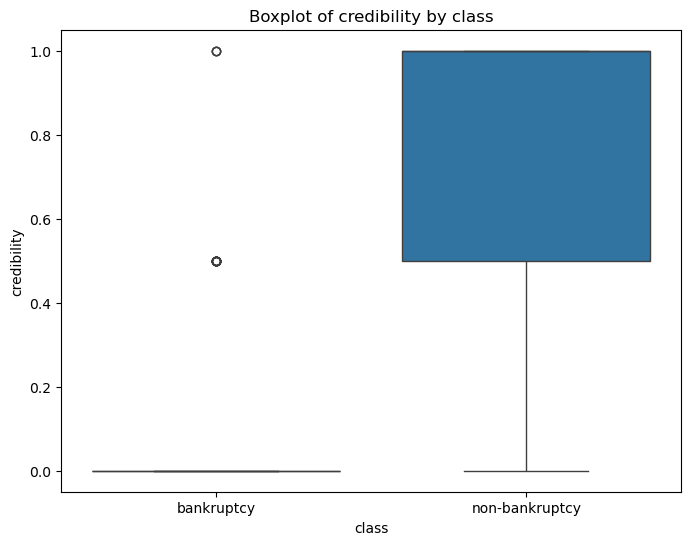

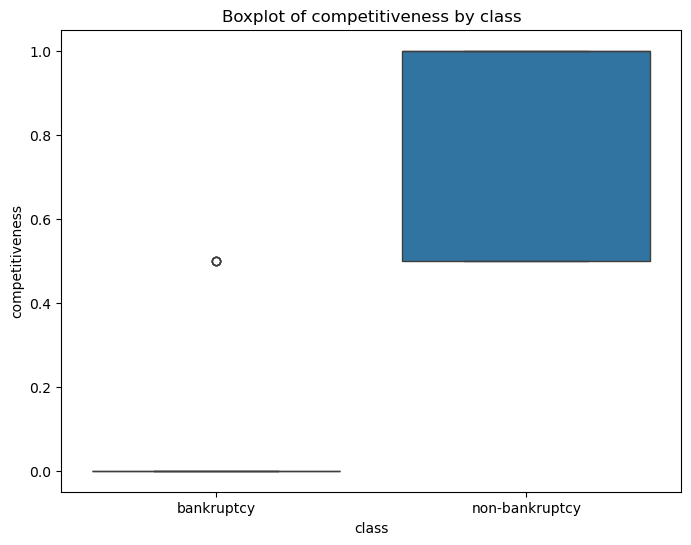

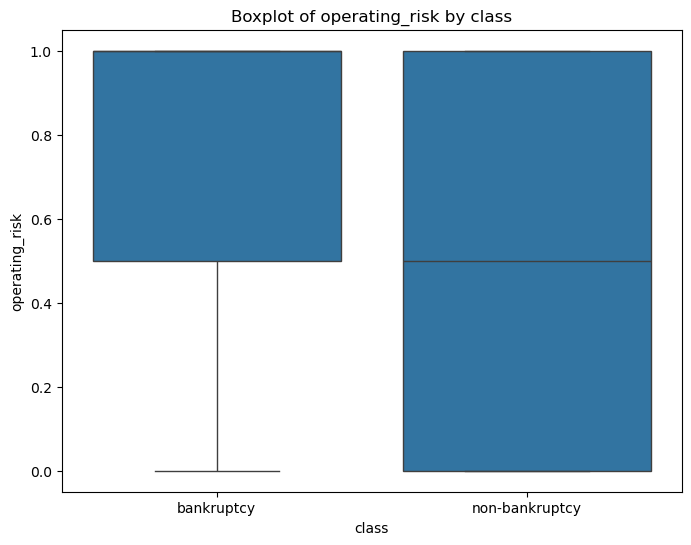

In [47]:
# Boxplots to visualize distributions of features by target class
for col in cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='class', y=col, data=data)
    plt.title(f'Boxplot of {col} by class')
    plt.show()

The boxplots show that most feature values are well within the interquartile range, indicating few or no significant outliers.

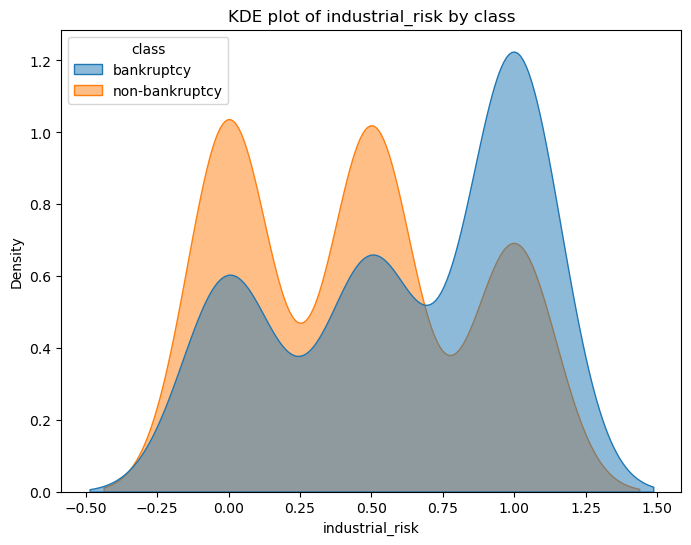

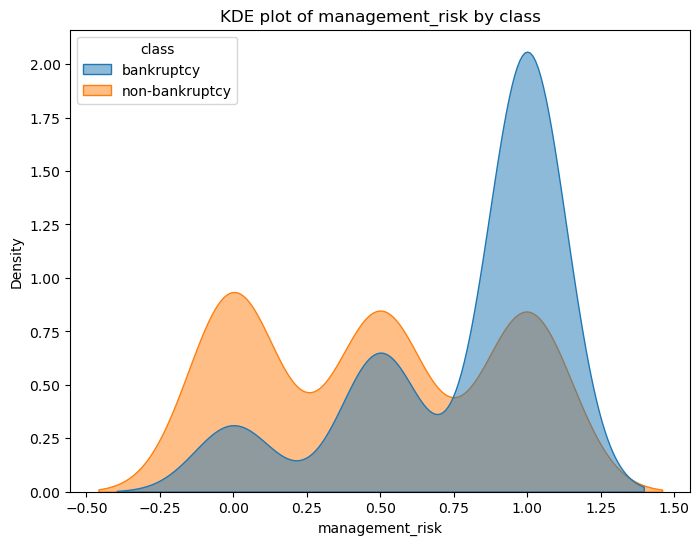

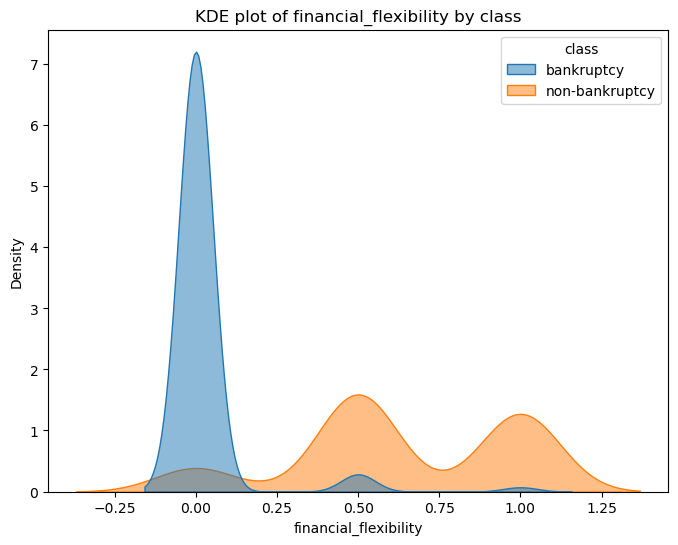

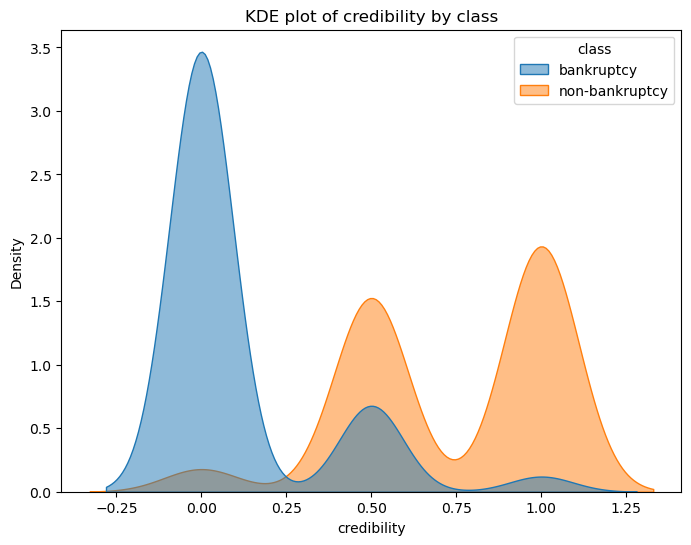

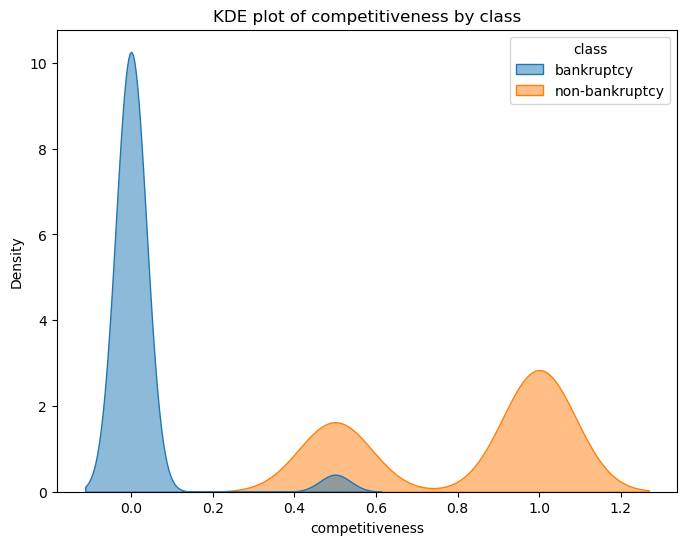

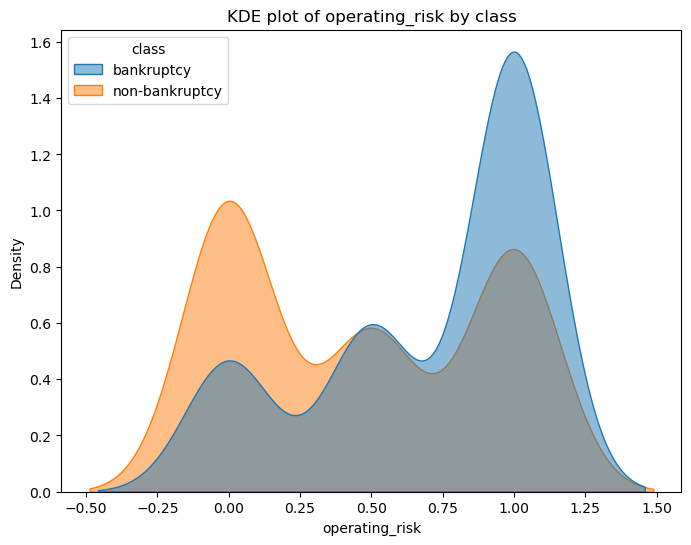

In [49]:
# KDE plots to visualize distributions of features by target class
for col in cols:    
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=data, x=col, hue='class', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'KDE plot of {col} by class')
    plt.show()   

In [50]:
le=LabelEncoder()

In [51]:
data['class'] = le.fit_transform(data['class'])


Correlation between feature and target

In [52]:
data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


Checking multicollinearity using VIF

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
X = data[['industrial_risk', 'management_risk', 'financial_flexibility', 
          'credibility', 'competitiveness', 'operating_risk']]
y = data['class']

# Add constant term for intercept
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                 Feature       VIF
0                  const  9.534951
1        industrial_risk  1.208550
2        management_risk  1.205396
3  financial_flexibility  1.931439
4            credibility  2.128103
5        competitiveness  2.788219
6         operating_risk  1.134261


All VIF values are below 5, indicating no significant multicollinearity among predictors.

Feature-Target Relationship (Chi-Square Test)

In [55]:
from sklearn.feature_selection import chi2
import pandas as pd

chi_scores = chi2(X, y)
pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores[0], 'p-value': chi_scores[1]})

,Feature,Chi2 Score,p-value
0,const,0.000000,1.000000e+00
1,industrial_risk,4.225298,3.982561e-02
2,management_risk,9.407190,2.161362e-03
3,financial_flexibility,60.237242,8.408608e-15
4,credibility,52.307251,4.746188e-13
5,competitiveness,82.186252,1.238483e-19
6,operating_risk,6.458129,1.104459e-02


Features with low p-values (< 0.05) — like financial_flexibility, credibility, competitiveness, management_risk, and operating_risk — have a strong and significant relationship with the target.
Only industrial_risk shows a weaker association, while the constant has no effect.

In [56]:
import ppscore as pps

In [57]:
matrix=pps.matrix(data)
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
1,industrial_risk,management_risk,0.108761,regression,True,mean absolute error,0.362,0.322629,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.000000,regression,True,mean absolute error,0.352,0.352440,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.346,0.361087,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.015113,regression,True,mean absolute error,0.388,0.382136,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000000,regression,True,mean absolute error,0.386,0.387298,DecisionTreeRegressor()
6,industrial_risk,class,0.000000,regression,True,mean absolute error,0.428,0.463702,DecisionTreeRegressor()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.338,0.348953,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
9,management_risk,financial_flexibility,0.042517,regression,True,mean absolute error,0.352,0.337034,DecisionTreeRegressor()


In [58]:
ppscore_matrix=matrix.pivot_table(index='x',columns='y',values='ppscore')
ppscore_matrix

y,class,competitiveness,credibility,financial_flexibility,industrial_risk,management_risk,operating_risk
x,,,,,,,
class,1.000000,0.619267,0.326136,0.458153,0.0,0.106567,0.031648
competitiveness,0.928592,1.000000,0.295761,0.441525,0.0,0.093487,0.039783
credibility,0.572262,0.358299,1.000000,0.303439,0.0,0.060903,0.024039
financial_flexibility,0.634376,0.362923,0.139462,1.000000,0.0,0.049875,0.000000
industrial_risk,0.000000,0.015113,0.000000,0.000000,1.0,0.108761,0.000000
management_risk,0.010108,0.022214,0.000000,0.042517,0.0,1.000000,0.000000
operating_risk,0.000000,0.000000,0.000000,0.000000,0.0,0.001124,1.000000


Here, competitiveness, financial_flexibility, and credibility have higher PP scores, indicating strong predictive power for the target class, while industrial_risk and operating_risk contribute very little.

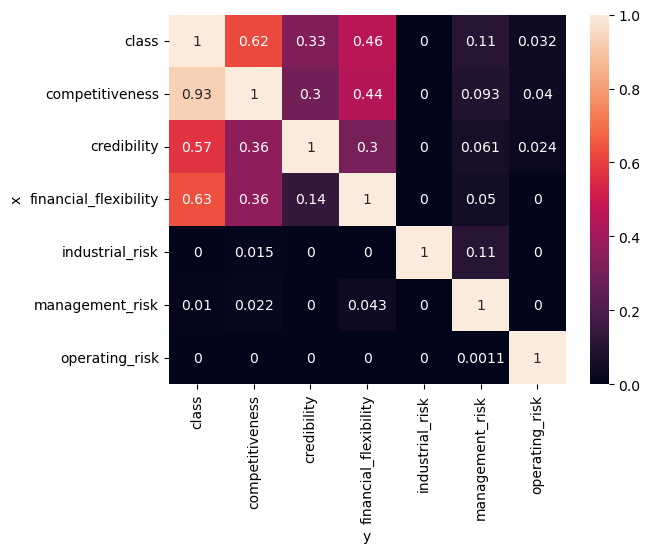

In [59]:
sns.heatmap(ppscore_matrix,annot=True)
plt.show()